In [4]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt 
import pandas as pd 
from collections import Counter
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [5]:
kompas = pd.read_csv('kompas.csv', index_col=0)

In [6]:
kompas.head()
paragraf = kompas.paragraf

In [7]:
type(paragraf)

pandas.core.series.Series

In [8]:
par = []
kat = []

In [9]:
for kalimat in paragraf: 
    par.append(kalimat.strip())

In [10]:
for word in par: 
    for kata in word.split(): 
        if kata.isalpha(): 
            kat.append(kata)
        

In [11]:
with open('stopwords-id.txt','r') as f: 
    stopword = f.readlines()

In [12]:
for i in range(len(stopword)): 
    stopword[i]=stopword[i].strip()

In [16]:
for kata in kat: 
    if (kata.lower() in stopword):
        kat.remove(kata)
#         print(f'removing {kata} from the list')

In [17]:
for i in range(len(kat)): 
    kat[i]=kat[i].lower()

In [18]:
sering = Counter(kat).most_common(5)
from pprint import pprint
pprint(sering)
# teks = " ".join(kata)

[('mudik', 127), ('tol', 114), ('jawa', 107), ('jalan', 100), ('kota', 96)]


In [19]:
teks = ' '.join(kat)
wc = WordCloud().generate(teks)

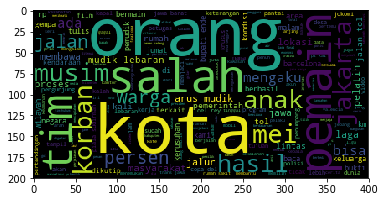

In [20]:
plt.imshow(wc)

## tf idf 
ekstraksi keyword pada berita

In [102]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [95]:
para = [] 
for berita in paragraf: 
    para.append(berita.strip())

In [42]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
 

In [96]:
len(para)

215

In [97]:
for i in range(len(para)): 
    para[i]=para[i].strip().lower()

In [98]:
berita_cakep = []

In [99]:
print('sebelum', len(stopword))
stopword.extend(['kompas','tol'])
stopword = list(set(stopword))
print('sesudah', len(stopword))

sebelum 783
sesudah 783


In [100]:
for news in para: 
    berita = []
    for kata in news.split():
        if kata not in stopword and kata.isalpha():
            berita.append(kata)
    berita_cakep.append(" ".join(berita))

In [101]:
berita_cakep

['memasuki jalan dilintasi infrastruktur bebas hambatan terpantau kondisi trek lurus gerbang berujung gt probolinggo pantauan tim merapah trans jawa jalan konsesinya dipegang pt waskita toll road simpang susun ekspedisi mudik merapah trans jawa surabaya ketiganya ss tongas km ss muneng km ss leces km kristianto kondisi aktual jalan beroperasi pasca diresmikan presiden joko dilintasi rest area km a istirahat tipe b proses jalan dilengkapi rest area istirahat km jalur a istirahat tipe b rampung dibangun alias tahap direktur utama pt trans jawa paspro toll road dwi istirahat melayani pemudik sepekan lebaran mempercepat membangun standar pom bensin bersifat kristianto kondisi aktual jalan beroperasi pasca diresmikan presiden joko dilintasi gerbang probolinggo istirahat istirahat bersifat temporer kepentingan pelayanan kesempatan direktur utama pt waskita toll road herwidiakto perusahaan due diligence mengisi istirahat peritel skala asing tertarik membuka gerainya ruas jalan mengacu peratur

In [103]:
cv=CountVectorizer()
berita_count_vector=cv.fit_transform(berita_cakep)

In [106]:
berita_count_vector.shape

(215, 7201)

In [107]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(berita_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [130]:
# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights'])[:5]

,idf_weights
salah,2.232144
jakarta,2.314835
tim,2.483458
orang,2.483458
rumah,2.546637


In [111]:
count_vector=cv.transform(berita_cakep)
tf_idf_vector=tfidf_transformer.transform(count_vector)

In [152]:
feature_names = cv.get_feature_names()
 
 
#print the scores
df = pd.DataFrame(tf_idf_vector[0].T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)[:5]

,tfidf
istirahat,0.410822
trans,0.259655
jalan,0.252242
km,0.202440
ss,0.181132


In [128]:
para[0]

'probolinggo, kompas.com -\xa0memasuki h-9 lebaran, jalan  tol pasuruan-probolinggo (paspro) siap dilintasi pemudik.\xa0\ninfrastruktur bebas hambatan ini terpantau dalam kondisi mulus, dengan trek lurus sepanjang 31,1 kilometer, mulai dari gerbang tol (grati) dan berujung di gt probolinggo timur.\ndari pantauan\xa0tim merapah trans jawa 4.0 kompas.com pada minggu (26/5/2019), jalan yang konsesinya dipegang oleh pt waskita toll road ini, memiliki tiga simpang susun (ss) atau\xa0interchange.\xa0\nbaca juga: ekspedisi mudik merapah trans jawa 4.0 sampai di surabaya\nketiganya adalah ss tongas di km 822, ss muneng di km 829, dan ss leces di km 840.\nkristianto purnomo/kompas.com kondisi aktual jalan tol pasuruan-probolinggo yang telah beroperasi pasca diresmikan presiden joko widodo, siap dilintasi pemudik, minggu (26/5/2019). tampak rest area yang berada di km 833 a . namun tempat istirahat tipe b ini masih dalam proses konstruksi.selain ss, jalan tol ini juga dilengkapi dengan dua\xa0 r

### memakai tfidf vectorizer

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer 

In [137]:
tfidf_vec = TfidfVectorizer(use_idf=True)
berita_vector = tfidf_vec.fit_transform(berita_cakep)

In [139]:
df = pd.DataFrame(berita_vector[0].T.todense(), index=tfidf_vec.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)[:5]

,tfidf
istirahat,0.410822
trans,0.259655
jalan,0.252242
km,0.202440
ss,0.181132


In [160]:
berita_coo = berita_vector.tocoo()

In [166]:
berita_ = zip(berita_coo.col, berita_coo.data)

In [173]:
for i in berita_:
    print(i)

(3693, 0.04327583038041298)
(2477, 0.2522415305651666)
(1442, 0.1811324311830625)
(2359, 0.04564692040143791)
(463, 0.05301219873122937)
(2148, 0.05606906543071868)
(6693, 0.048703787100927216)
(3083, 0.13415784811838632)
(6848, 0.05606906543071868)
(3425, 0.05606906543071868)
(2022, 0.08655166076082596)
(751, 0.05606906543071868)
(2093, 0.05606906543071868)
(5486, 0.11213813086143735)
(4744, 0.04327583038041298)
(6770, 0.02638885464788377)
(4294, 0.14611136130278166)
(6840, 0.25965498228247785)
(2507, 0.17798891286625293)
(3092, 0.06037747706102083)
(1480, 0.06037747706102083)
(5524, 0.09816505653159437)
(7096, 0.11213813086143735)
(6813, 0.16820719629215602)
(5747, 0.15192332613061332)
(6167, 0.050641108710204434)
(6407, 0.05606906543071868)
(1756, 0.06037747706102083)
(4437, 0.08408051018838887)
(6384, 0.048703787100927216)
(2970, 0.06037747706102083)
(6283, 0.1811324311830625)
(6816, 0.06037747706102083)
(3037, 0.20243993462044044)
(4453, 0.06037747706102083)
(3292, 0.0603774770610

(6490, 0.062454870399075005)
(5760, 0.08493829514662483)
(13, 0.08493829514662483)
(3531, 0.08493829514662483)
(2081, 0.08493829514662483)
(2891, 0.07887727444021295)
(6276, 0.08493829514662483)
(3682, 0.07124129141455274)
(50, 0.07887727444021295)
(1834, 0.08493829514662483)
(3818, 0.08493829514662483)
(2757, 0.07457691181189877)
(5599, 0.08493829514662483)
(1661, 0.07457691181189877)
(5148, 0.060879908079826656)
(4519, 0.08493829514662483)
(4943, 0.08493829514662483)
(3105, 0.07124129141455274)
(4492, 0.08493829514662483)
(6275, 0.07887727444021295)
(3599, 0.08493829514662483)
(1942, 0.1577545488804259)
(3364, 0.07887727444021295)
(1626, 0.08493829514662483)
(1809, 0.2548148854398745)
(6410, 0.07124129141455274)
(6397, 0.07457691181189877)
(5988, 0.06621159797728203)
(2368, 0.07457691181189877)
(1611, 0.07124129141455274)
(1024, 0.08493829514662483)
(5286, 0.053854145142446616)
(1810, 0.08493829514662483)
(3634, 0.05481888737341478)
(264, 0.07887727444021295)
(5573, 0.068515891105486

(3853, 0.0467404982231151)
(5718, 0.050833898657482564)
(4286, 0.04794967421904098)
(4159, 0.0467404982231151)
(545, 0.052603017768555665)
(5635, 0.04930141797763754)
(2295, 0.04794967421904098)
(1878, 0.04794967421904098)
(5772, 0.22015878652614035)
(5960, 0.060557961108988465)
(3442, 0.11451272263614069)
(50, 0.30278980554494234)
(4772, 0.04464807442812286)
(2159, 0.3651733238605961)
(942, 0.5450216499808962)
(5634, 0.36334776665393076)
(1559, 0.0546954415635479)
(3381, 0.14384902265712293)
(1283, 0.060557961108988465)
(2144, 0.0546954415635479)
(6058, 0.06521130465850315)
(2865, 0.12111592221797693)
(6312, 0.06521130465850315)
(5320, 0.3260565232925157)
(486, 0.09860283595527508)
(489, 0.06521130465850315)
(446, 0.06521130465850315)
(3621, 0.060557961108988465)
(3455, 0.06521130465850315)
(3443, 0.060557961108988465)
(3386, 0.06521130465850315)
(1481, 0.057256361318070347)
(1103, 0.060557961108988465)
(2574, 0.157809053305667)
(2612, 0.057256361318070347)
(3000, 0.06521130465850315)

(1838, 0.06618027372251759)
(6115, 0.07126564225527825)
(3090, 0.05387865240040282)
(5957, 0.06618027372251759)
(4380, 0.1425312845105565)
(1753, 0.07126564225527825)
(4941, 0.07126564225527825)
(3558, 0.06618027372251759)
(3746, 0.07126564225527825)
(1752, 0.07126564225527825)
(4477, 0.21379692676583473)
(3300, 0.07126564225527825)
(4241, 0.1425312845105565)
(4468, 0.07126564225527825)
(3059, 0.06257214732784053)
(5791, 0.06257214732784053)
(6270, 0.07126564225527825)
(2207, 0.17932040120381268)
(6024, 0.07126564225527825)
(6435, 0.2502885893113621)
(5178, 0.42759385353166945)
(3804, 0.06257214732784053)
(588, 0.06618027372251759)
(311, 0.06618027372251759)
(1974, 0.06618027372251759)
(4283, 0.07126564225527825)
(1482, 0.06257214732784053)
(6772, 0.19854082116755276)
(2029, 0.07126564225527825)
(439, 0.21551460960161128)
(5727, 0.21379692676583473)
(937, 0.07126564225527825)
(6186, 0.07126564225527825)
(4032, 0.07126564225527825)
(1916, 0.07126564225527825)
(798, 0.07126564225527825)


(5310, 0.058379204180808046)
(5788, 0.03901779612505468)
(3955, 0.052564928873347724)
(3868, 0.06581781631517004)
(3714, 0.04457798098971636)
(4425, 0.06239896645414774)
(2609, 0.04410651909742032)
(3562, 0.052564928873347724)
(1402, 0.06093869035358863)
(2829, 0.07643773397789688)
(894, 0.06093869035358863)
(5835, 0.05339330912828711)
(2273, 0.06093869035358863)
(2828, 0.0483601989303986)
(2525, 0.059605562721728574)
(1203, 0.05103151992487957)
(2741, 0.05103151992487957)
(3417, 0.06093869035358863)
(5397, 0.06401322679101394)
(413, 0.058379204180808046)
(757, 0.06401322679101394)
(2784, 0.06401322679101394)
(3923, 0.05426905047981645)
(6490, 0.06401322679101394)
(4752, 0.07301888411687459)
(1245, 0.07301888411687459)
(6553, 0.07643773397789688)
(6683, 0.08084539804718226)
(2790, 0.06581781631517004)
(4833, 0.4480925875370976)
(6501, 0.07643773397789688)
(5939, 0.08084539804718226)
(5235, 0.07643773397789688)
(2515, 0.07643773397789688)
(6056, 0.0702254803844554)
(5942, 0.080845398047

(384, 0.13412633485509048)
(3617, 0.043205154397047495)
(2834, 0.04648718788008861)
(7078, 0.07288805044602027)
(6761, 0.04648718788008861)
(1763, 0.1459913559431215)
(7039, 0.13412633485509048)
(916, 0.09297437576017722)
(3222, 0.05146990745906752)
(6513, 0.15440972237720257)
(3669, 0.05146990745906752)
(5197, 0.04866378531437383)
(4209, 0.04866378531437383)
(1624, 0.04648718788008861)
(6874, 0.044708778285030164)
(2763, 0.044708778285030164)
(1285, 0.04866378531437383)
(4048, 0.11084982897682237)
(1253, 0.055424914488411185)
(6478, 0.055424914488411185)
(223, 0.055424914488411185)
(5526, 0.055424914488411185)
(3309, 0.055424914488411185)
(4614, 0.055424914488411185)
(3250, 0.055424914488411185)
(516, 0.055424914488411185)
(3741, 0.055424914488411185)
(3240, 0.055424914488411185)
(801, 0.055424914488411185)
(6109, 0.05146990745906752)
(3534, 0.055424914488411185)
(248, 0.055424914488411185)
(2567, 0.055424914488411185)
(4476, 0.055424914488411185)
(4242, 0.055424914488411185)
(2492, 0

(5357, 0.0906503218121298)
(2129, 0.0641862940441956)
(5034, 0.08570809657764836)
(535, 0.07874242133791025)
(1066, 0.08570809657764836)
(1065, 0.07177674609817214)
(1949, 0.07380019610342882)
(1472, 0.14760039220685764)
(1970, 0.07380019610342882)
(6669, 0.08187460886387454)
(4691, 0.07874242133791025)
(1735, 0.08570809657764836)
(6444, 0.1813006436242596)
(2144, 0.08187460886387454)
(138, 0.0683293301139863)
(6976, 0.08187460886387454)
(4627, 0.13366904172738142)
(861, 0.0906503218121298)
(5963, 0.07380019610342882)
(3464, 0.08570809657764836)
(5758, 0.19523199410373582)
(3132, 0.09761599705186791)
(5248, 0.09761599705186791)
(5361, 0.2928479911556037)
(6311, 0.09761599705186791)
(1458, 0.09761599705186791)
(5340, 0.09761599705186791)
(659, 0.0906503218121298)
(1716, 0.09761599705186791)
(4648, 0.09761599705186791)
(6480, 0.1574848426758205)
(4323, 0.09761599705186791)
(3578, 0.09761599705186791)
(4525, 0.09761599705186791)
(5716, 0.09761599705186791)
(7088, 0.19523199410373582)
(819

(6874, 0.1281749718357933)
(2763, 0.06408748591789665)
(2465, 0.07377917930230932)
(6109, 0.07377917930230932)
(2492, 0.13951352623253074)
(2845, 0.07377917930230932)
(2764, 0.07944845650067804)
(1982, 0.15889691300135608)
(1933, 0.07944845650067804)
(2553, 0.07944845650067804)
(2472, 0.042651985350906294)
(3952, 0.05249271890554248)
(5221, 0.08161329756509045)
(7083, 0.050934707273292835)
(7115, 0.07328524845172651)
(6744, 0.0919244948185413)
(1430, 0.07168202086098173)
(5788, 0.04692304456285472)
(4440, 0.1838489896370826)
(6334, 0.0663813366071019)
(2609, 0.053042774494166944)
(5214, 0.07504138558261401)
(2654, 0.225124156747842)
(1277, 0.0791529157128216)
(64, 0.07168202086098173)
(4352, 0.1376834369187415)
(1242, 0.08445359996670143)
(6714, 0.0878129646883337)
(5701, 0.07168202086098173)
(2525, 0.07168202086098173)
(1203, 0.06137082360753088)
(2741, 0.06137082360753088)
(396, 0.07504138558261401)
(5126, 0.09722517907242113)
(6998, 0.16890719993340286)
(4973, 0.09722517907242113)
(

(3457, 0.0385502385452883)
(6138, 0.07083436098618649)
(5789, 0.0385502385452883)
(69, 0.0385502385452883)
(3565, 0.03682599227536294)
(491, 0.04077317860978028)
(4336, 0.04077317860978028)
(5085, 0.04077317860978028)
(5627, 0.04390623666197534)
(2681, 0.04390623666197534)
(5088, 0.04390623666197534)
(872, 0.04390623666197534)
(1163, 0.08781247332395067)
(5451, 0.04390623666197534)
(2878, 0.04077317860978028)
(141, 0.04390623666197534)
(779, 0.04390623666197534)
(2509, 0.08781247332395067)
(192, 0.4829686032817287)
(6213, 0.131718709985926)
(4536, 0.04390623666197534)
(7091, 0.04390623666197534)
(4539, 0.04390623666197534)
(4535, 0.04390623666197534)
(5006, 0.04390623666197534)
(4685, 0.08781247332395067)
(3436, 0.04390623666197534)
(3252, 0.04390623666197534)
(6710, 0.04390623666197534)
(3407, 0.08781247332395067)
(1123, 0.04390623666197534)
(2312, 0.04390623666197534)
(5532, 0.04390623666197534)
(6700, 0.04390623666197534)
(1321, 0.08781247332395067)
(2477, 0.23438371553972856)
(6770

In [174]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

In [178]:
berita_coo_sorted = sort_coo(berita_coo)

In [177]:
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [179]:
extract_topn_from_vector(tfidf_vec.get_feature_names(), berita_coo_sorted,10)

{'koper': 0.842,
 'taman': 0.75,
 'seksi': 0.742,
 'gempa': 0.676,
 'sofa': 0.73,
 'klx': 0.725,
 'wine': 0.704,
 'oppo': 0.692,
 'dapur': 0.688}

In [181]:
judul = kompas.judul.tolist()
body_text = kompas.paragraf.tolist()

['PROBOLINGGO, KOMPAS.com -\xa0Memasuki H-9 Lebaran, Jalan  Tol Pasuruan-Probolinggo (Paspro) siap dilintasi pemudik.\xa0\nInfrastruktur bebas hambatan ini terpantau dalam kondisi mulus, dengan trek lurus sepanjang 31,1 kilometer, mulai dari Gerbang Tol (Grati) dan berujung di GT Probolinggo Timur.\nDari pantauan\xa0Tim Merapah Trans Jawa 4.0 Kompas.com pada Minggu (26/5/2019), jalan yang konsesinya dipegang oleh PT Waskita Toll Road ini, memiliki tiga simpang susun (SS) atau\xa0interchange.\xa0\nBaca juga: Ekspedisi Mudik Merapah Trans Jawa 4.0 Sampai di Surabaya\nKetiganya adalah SS Tongas di KM 822, SS Muneng di KM 829, dan SS Leces di KM 840.\nKristianto Purnomo/Kompas.com Kondisi aktual Jalan Tol Pasuruan-Probolinggo yang telah beroperasi pasca diresmikan Presiden Joko Widodo, siap dilintasi pemudik, Minggu (26/5/2019). Tampak rest area yang berada di KM 833 A . Namun tempat istirahat tipe B ini masih dalam proses konstruksi.Selain SS, jalan tol ini juga dilengkapi dengan dua\xa0 